### In this classification problem, we will be using the MNIST dataset consists of 70000 small image of digits. Each image is labeled with the digit it represents. In this project we will use a binary classification algorithms to classify an image represents digit 4 and an image does not represent digit 4.
Reference: "Hands - On Machine Learning with Scikit - Learn, Keras, and TensorFlow, 2nd Edition, by Aurelien Geron (O'Reilly)"

### The following code fetches MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

### There are 70000 images and each image is of size 28x28

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### consider each instance, reshape it to 28x28 array and display using Matplotlib's imshow() function

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("on")
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
y[2]

'4'

### cast y to integer

In [6]:
import numpy as np
y = y.astype(np.uint8)
y[2]

4

### split the dataset into training and test set

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

### use SGDClassifier class for binary classifier

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

### Evaluate the model using cross_val_score() function

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_4, cv = 5, scoring = "accuracy")

array([0.97966836, 0.95317057, 0.97083333, 0.97091424, 0.98091508])

In [12]:
from sklearn.base import BaseEstimator

class Never4Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [13]:
never_4_clf = Never4Classifier()
cross_val_score(never_4_clf, X_train, y_train_4, cv = 5, scoring = "accuracy")

array([0.90133333, 0.90308333, 0.90333333, 0.90433333, 0.90108333])

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3)

In [15]:
y_train_pred

array([False, False,  True, ..., False, False, False])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_pred, y_train_4)

array([[53620,   739],
       [  538,  5103]], dtype=int64)

In [17]:
y_train_perfect_predictions = y_train_4
confusion_matrix(y_train_4, y_train_perfect_predictions)

array([[54158,     0],
       [    0,  5842]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.9046268392129055

In [19]:
recall_score(y_train_4, y_train_pred)

0.8735022252653201

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_pred)

0.8887921274928153

### precision / recall trade off

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3214.66574913])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [23]:
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3, method = "decision_function")
y_scores

array([-41662.72279139, -35275.90248401,   7016.05130379, ...,
       -23251.76414619, -17681.56184909, -32666.09311502])

In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)  
    plt.grid(True)    
    plt.axis([-50000, 50000, 0, 1])

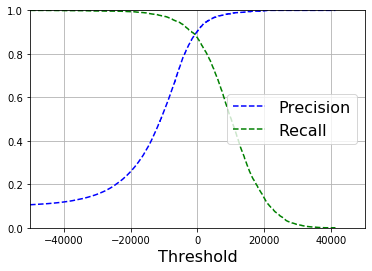

In [27]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [28]:
recall_90 = recalls[np.argmax(precisions >= 0.90)]
recall_90

0.876583361862376

In [29]:
threshold_90 = thresholds[np.argmax(precisions >= 0.90)]
threshold_90

-176.9702174543858

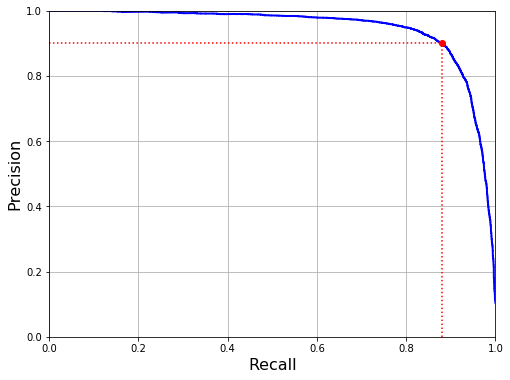

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.88, 0.88], [0., 0.9], "r:")
plt.plot([0.0, 0.88], [0.9, 0.9], "r:")
plt.plot([0.88], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

In [31]:
y_train_pred_90 = (y_scores >= threshold_90)

In [32]:
precision_score(y_train_4, y_train_pred_90)

0.9

In [33]:
recall_score(y_train_4, y_train_pred_90)

0.876583361862376

### ROC curve

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

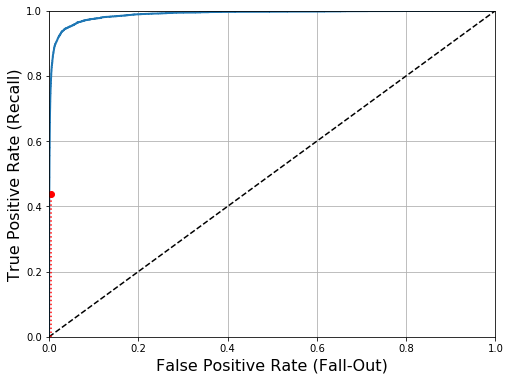

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
#save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9889289278094466

### RandomForestClassifer

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth = 2, random_state = 0)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv = 3, method = "predict_proba")

C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_4, y_scores_forest)

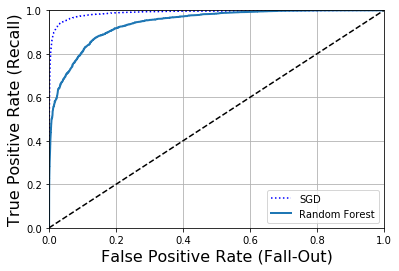

In [39]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [40]:
roc_auc_score(y_train_4, y_scores_forest)

0.9415568413891473

### lets measure precision and recall for Random Forest

#### aim for 90% precision

In [41]:
prec_for, rec_for, thr_for = precision_recall_curve(y_train_4, y_scores_forest)

In [42]:
thr_90_for = thr_for[np.argmax(prec_for >= 0.90)]
thr_90_for

0.2599362457995138

In [43]:
y_train_pred_for_90 = (y_scores_forest >= thr_90_for)

In [44]:
precision_score(y_train_4, y_train_pred_for_90)

0.9006968641114983

In [45]:
recall_score(y_train_4, y_train_pred_for_90)

0.44248545018829166

<Figure size 3600x2520 with 0 Axes>

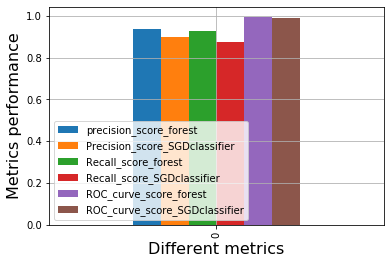

In [46]:
import pandas as pd

df = pd.DataFrame({
    "precision_score_forest": [0.9402804223645491],
    "Precision_score_SGDclassifier":[0.9],
    "Recall_score_forest":[0.9298185552892845],
    "Recall_score_SGDclassifier":[0.876583361862376],
    "ROC_curve_score_forest":[0.9932994893698568],
    "ROC_curve_score_SGDclassifier":[0.9889289278094466]
})

plt.figure(figsize=(50, 35))
df.plot(kind = "bar")
plt.xlabel('Different metrics', fontsize=16)
plt.ylabel('Metrics performance', fontsize=16)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

In [47]:
cross_val_score(forest_clf, X_train, y_train_4, cv = 5, scoring = "accuracy")

C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mahesh Kumar M R\Anacon

array([0.90259145, 0.90259145, 0.90266667, 0.90265855, 0.90265855])

In [48]:
frst_fit_train = forest_clf.fit(X_train, y_train_4)

C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
frst_predictions_test = forest_fit.predict(X_test)

In [56]:
sgd_predictions_test = sgd_clf.predict(X_test)